In [ ]:
!pip install shap

In [ ]:
#import necessary modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
#check for the null values
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
#get the size of the dataset
df.shape

(569, 6)

In [ ]:
#separate the dataset into target variable and features
y = df['diagnosis']
X = df.iloc[:, 0:5]

In [ ]:
#splitting the dataset into train and test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#fit the model based on the given training samples
rf=RandomForestClassifier(random_state=20)
rf.fit(X_train, y_train)

#get the accuracy of the model
rf.score(X_test, y_test)

0.956140350877193

In [ ]:
import shap

#create an explainer for a tree-based model, i.e., random forest (rf)
explainer = shap.TreeExplainer(rf) 
shap_values = explainer.shap_values(X.iloc[0])
shap_values

[array([ 0.13037992, -0.15129243,  0.28253877,  0.16160983,  0.09540126]),
 array([-0.13037992,  0.15129243, -0.28253877, -0.16160983, -0.09540126])]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values=shap_values[0], features=X.iloc[0, :])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values=shap_values[1], features=X.iloc[0, :])

In [ ]:
#global interpretability
#passing the entire dataset
shap_values = explainer.shap_values(X)

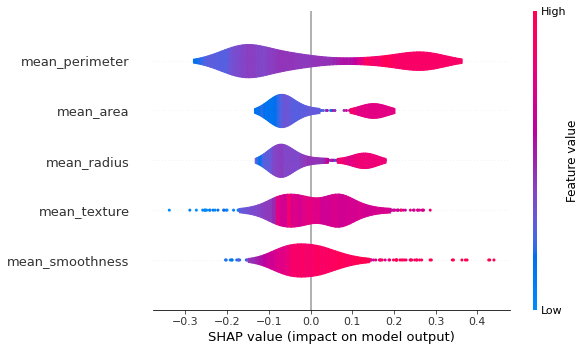

In [ ]:
shap.summary_plot(shap_values[0], X, plot_type='violin', plot_size=0.8)

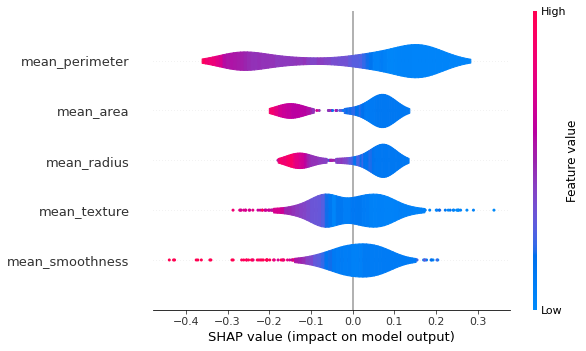

In [ ]:
shap.summary_plot(shap_values[1], X, plot_type='violin', plot_size=0.8)

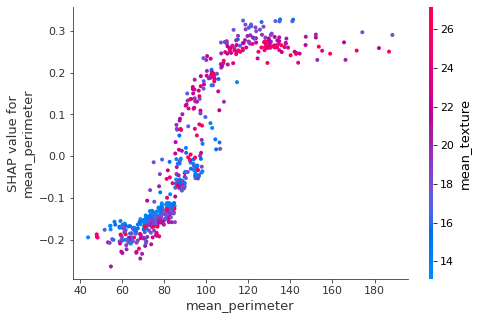

In [ ]:
shap.dependence_plot("mean_perimeter", shap_values[0], X)

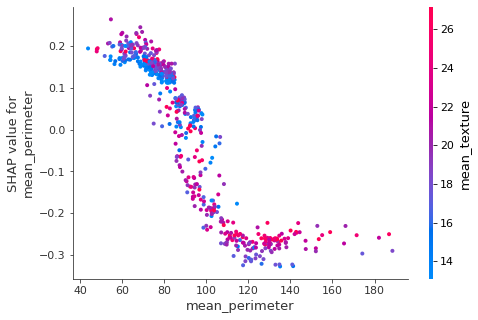

In [ ]:
shap.dependence_plot("mean_perimeter", shap_values[1], X)